# Наумов П. 3413

Тема 6. Создание собственных распределений в Python

Изучите материал из Notebook «Создание собственных распределений в Python».
Рассмотрите функцию (НЕ из рассмотренных в лекции законов НСВ), которая является плотностью вероятности некоторой непрерывной случайной величины (функция плотности должна быть определена в классе).  Для этой случайной величины:
1)	проверьте условие нормировки плотности;
2)	постройте графики плотности и функции распределения;
3)	рассчитайте вероятность попадания случайной величины в некоторый интервал;
4)	вычислите математическое ожидание, дисперсию и среднее квадратическое отклонение; 
5)	вычислите квантиль уровня q и p%-ную точку случайной величины;
6)	определите коэффициент асимметрии и эксцесс.


Выбранная функция, которая является плотностью вероятности:  
0 при x<0;  
8*x*e^(-4*x^2) при x>=0. 

Проверка нормировки плотности: 1.000000, ошибка: 6.84e-11


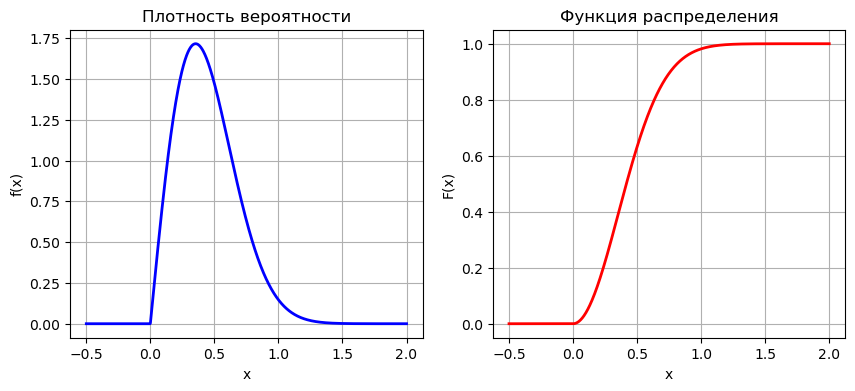

P(1 < X < 2) = 0.018316
Математическое ожидание: 0.443113
Дисперсия: 0.053650
Среднее квадратическое отклонение: 0.231626
Квантиль уровня 0.75: 0.588705
25%-ная точка: 0.588705
Коэффициент асимметрии: 0.631111
Эксцесс: 0.245089


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous
from scipy import integrate

class MyDistribution(rv_continuous):
    def _pdf(self, x):
        return np.where(x >= 0, 8 * x * np.exp(-4 * x**2), 0)
    
    def _cdf(self, x):
        return np.where(x >= 0, 1 - np.exp(-4 * x**2), 0)
    
    def _ppf(self, q):
        return np.sqrt(-np.log(1 - q)) / 2

# Создаем экземпляр распределения
my_dist = MyDistribution(a=0.0, b=None)

# 1. Проверка нормировки
integral, error = integrate.quad(my_dist.pdf, 0, np.inf)
print(f"Проверка нормировки плотности: {integral:.6f}, ошибка: {error:.2e}")

# 2. Построение графиков
x = np.linspace(-0.5, 2, 1000)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(x, my_dist.pdf(x), 'b-', lw=2)
ax1.set_title('Плотность вероятности')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.grid(True)

ax2.plot(x, my_dist.cdf(x), 'r-', lw=2)
ax2.set_title('Функция распределения')
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.grid(True)
plt.show()

# 3. Вероятность попадания в интервал [1, 2]
a, b = 1, 2
prob = my_dist.cdf(b) - my_dist.cdf(a)
print(f"P({a} < X < {b}) = {prob:.6f}")

# 4. Математическое ожидание, дисперсия, СКО
mean = my_dist.mean()
var = my_dist.var()
std = my_dist.std()
print(f"Математическое ожидание: {mean:.6f}")
print(f"Дисперсия: {var:.6f}")
print(f"Среднее квадратическое отклонение: {std:.6f}")

# 5. Квантиль уровня q=0.75 и p%-ная точка p=25%
q = 0.75
quantile_q = my_dist.ppf(q)
print(f"Квантиль уровня {q}: {quantile_q:.6f}")

p = 25  # 25%-ная точка
quantile_p = my_dist.ppf((100-p)/100)
print(f"{p}%-ная точка: {quantile_p:.6f}")

# 6. Коэффициент асимметрии и эксцесс
skewness = my_dist.stats(moments='s')  # 's' возвращает коэффициент асимметрии
kurtosis = my_dist.stats(moments='k')  # 'k' возвращает эксцесс
print(f"Коэффициент асимметрии: {skewness:.6f}")
print(f"Эксцесс: {kurtosis:.6f}")